# Figures 1 and 3 (Molina et al., under review)

Figure 1. Weather regime composites of daily 500-hPa geopotential height anomalies (meters) computed from
ERA5 (September-March; 1999-2019). Weather regimes are illustrated hemispherically, but 10-70◦N, 150-40◦W
was used for their computation, indicated with the black polygon. Hatching indicates statistical significance at
the 99% confidence level using a two-tailed 10,000-member bootstrap resampling test (Chernick 2011).

Figure 3. Similar to Fig. 1, but for CESM2 daily 500-hPa geopotential height anomalies in meters (September-
March, 1999-2019). Individual ensemble members (11 total) and lead days 0-42 considered.

## Imports

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import cartopy
import cartopy.crs as ccrs
import cartopy.feature
from shapely import geometry

In [2]:
mpl.rcParams['hatch.linewidth'] = 0.3

## functions

In [3]:
def get_cold_indx(ds, mo_init=9, mo_end=2):
    """
    Extract indices for cold season.
    Grabbing Sept thru February init, for Oct thru March predictions.
    """
    dt_array = pd.to_datetime(ds['time'])
    return xr.where((dt_array.month >= mo_init) | (dt_array.month <= mo_end),
                    True, False)

## open data

In [4]:
ds_era51 = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/era5_wxregimes1.nc')
ds_cesm1 = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/cesm_wxregimes1.nc')

ds_era52 = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/era5_wxregimes2.nc')
ds_cesm2 = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/cesm_wxregimes2.nc')

ds_era53 = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/era5_wxregimes3.nc')
ds_cesm3 = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/cesm_wxregimes3.nc')

ds_era54 = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/era5_wxregimes4.nc')
ds_cesm4 = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/cesm_wxregimes4.nc')

In [5]:
ds_era5 = xr.merge([ds_era51, ds_era52, ds_era53, ds_era54])
ds_cesm = xr.merge([ds_cesm1, ds_cesm2, ds_cesm3, ds_cesm4])

## figure (era5 weather regimes)

In [6]:
total = ds_era5['wr_nums'].sum().values
print(ds_era5["wr_nums"].isel(wr=0).values / total, ds_era5["wr_nums"].isel(wr=0).values)
print(ds_era5["wr_nums"].isel(wr=1).values / total, ds_era5["wr_nums"].isel(wr=1).values)
print(ds_era5["wr_nums"].isel(wr=2).values / total, ds_era5["wr_nums"].isel(wr=2).values)
print(ds_era5["wr_nums"].isel(wr=3).values / total, ds_era5["wr_nums"].isel(wr=3).values)

0.19339945280437756 4524.0
0.22824042407660738 5339.0
0.27393980848153215 6408.0
0.3044203146374829 7121.0


/glade/scratch/molina/ipykernel_290769/3817218628.py:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


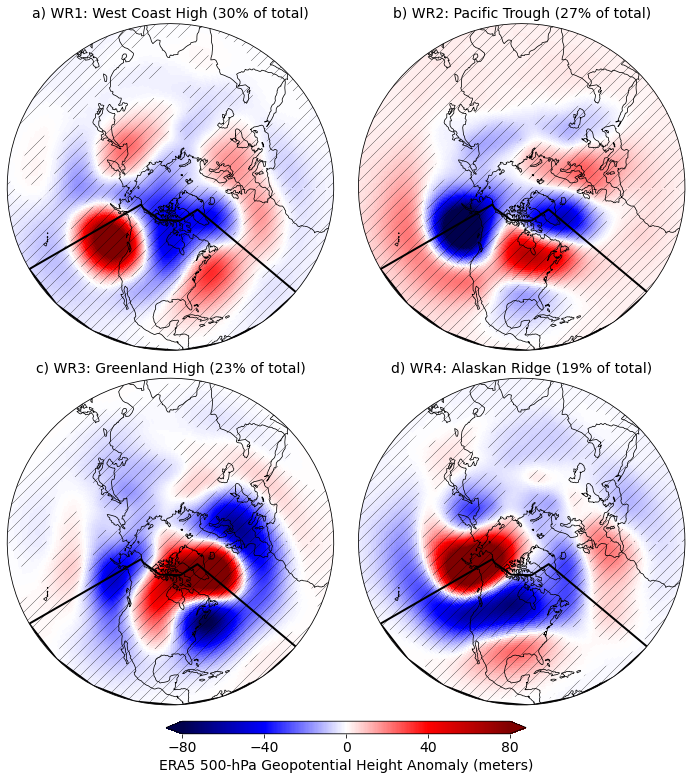

In [7]:
total = ds_era5['wr_nums'].sum().values
lons, lats = np.meshgrid(ds_era5['wr1_era5'].lon, ds_era5['wr1_era5'].lat)

# ---

fig, axs = plt.subplots(
    2, 2,
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=-90)),
    figsize=(10, 10))

# ---

axs[1][1].pcolormesh(lons, lats, ds_era5['wr1_era5'].values,
                     transform=ccrs.PlateCarree(),
                     vmin=-80, vmax=80, cmap='seismic')

axs[1][1].contourf(lons, lats, np.where((
    ds_era5['wr1_era5'].values <= ds_era5['wr1_era5_005'].values) | (
    ds_era5['wr1_era5'].values >= ds_era5['wr1_era5_995'].values),
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[1][1].set_title(
    f'd) WR4: Alaskan Ridge ({int(np.around((ds_era5["wr_nums"].isel(wr=0).values / total) * 100))}% of total)', 
    fontsize=14)

axs[1][1].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[1][1].margins(x=0, y=0)

axs[1][1].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[1][1].set_boundary(circle, transform=axs[1][1].transAxes)

geom = geometry.box(minx=210-360, maxx=320-360, miny=10, maxy=70)
# 10-70°N, 150-40°W
axs[1][1].add_geometries([geom], crs=cartopy.crs.PlateCarree(),
                         facecolor='none', edgecolor='k', lw=2.)

# ---

axs[1][0].pcolormesh(lons, lats, ds_era5['wr2_era5'].values,
                     transform=ccrs.PlateCarree(), 
                     vmin=-80, vmax=80, cmap='seismic')

axs[1][0].contourf(lons, lats, np.where((
    ds_era5['wr2_era5'].values <= ds_era5['wr2_era5_005'].values) | (
    ds_era5['wr2_era5'].values >= ds_era5['wr2_era5_995'].values),
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[1][0].set_title(
    f'c) WR3: Greenland High ({int(np.around((ds_era5["wr_nums"].isel(wr=1).values / total) * 100))}% of total)', 
    fontsize=14)

axs[1][0].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[1][0].margins(x=0, y=0)

axs[1][0].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[1][0].set_boundary(circle, transform=axs[1][0].transAxes)

geom = geometry.box(minx=210-360, maxx=320-360, miny=10, maxy=70)

axs[1][0].add_geometries([geom], crs=cartopy.crs.PlateCarree(),
                         facecolor='none', edgecolor='k', lw=2.)

# ---

axs[0][1].pcolormesh(lons, lats, ds_era5['wr3_era5'].values,
                     transform=ccrs.PlateCarree(),
                     vmin=-80, vmax=80, cmap='seismic')

axs[0][1].contourf(lons, lats, np.where((
    ds_era5['wr3_era5'].values <= ds_era5['wr3_era5_005'].values) | (
    ds_era5['wr3_era5'].values >= ds_era5['wr3_era5_995'].values),
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[0][1].set_title(
    f'b) WR2: Pacific Trough ({int(np.around((ds_era5["wr_nums"].isel(wr=2).values / total) * 100))}% of total)', 
    fontsize=14)

axs[0][1].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[0][1].margins(x=0, y=0)

axs[0][1].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[0][1].set_boundary(circle, transform=axs[0][1].transAxes)

geom = geometry.box(minx=210-360, maxx=320-360, miny=10, maxy=70)

axs[0][1].add_geometries([geom], crs=cartopy.crs.PlateCarree(),
                         facecolor='none', edgecolor='k', lw=2.)

# ---

pm = axs[0][0].pcolormesh(lons, lats, ds_era5['wr4_era5'].values,
                          transform=ccrs.PlateCarree(),
                          vmin=-80, vmax=80, cmap='seismic')

axs[0][0].contourf(lons, lats, np.where((
    ds_era5['wr4_era5'].values <= ds_era5['wr4_era5_005'].values) | (
    ds_era5['wr4_era5'].values >= ds_era5['wr4_era5_995'].values),
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[0][0].set_title(
    f'a) WR1: West Coast High ({int(np.around((ds_era5["wr_nums"].isel(wr=3).values / total) * 100))}% of total)', 
    fontsize=14)

axs[0][0].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[0][0].margins(x=0,y=0)

axs[0][0].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[0][0].set_boundary(circle, transform=axs[0][0].transAxes)

geom = geometry.box(minx=210-360, maxx=320-360, miny=10, maxy=70)

axs[0][0].add_geometries([geom], crs=cartopy.crs.PlateCarree(),
                         facecolor='none', edgecolor='k', lw=2.)

# ---

cbar_ax = fig.add_axes([0.25, -0.025, 0.5, 0.0175])

ticks_1 = [-80, -40, 0, 40, 80]
cbar = fig.colorbar(pm, cax=cbar_ax, ticks=ticks_1[:],
                    orientation='horizontal', extend='both')

cbar.ax.tick_params(labelsize=14)
cbar.set_label(
    r'ERA5 500-hPa Geopotential Height Anomaly (meters)', fontsize=14)

# ---

plt.tight_layout()
plt.savefig("fig1_wr_era5.png", bbox_inches='tight', dpi=500)
plt.savefig("fig1_wr_era5.pdf", bbox_inches='tight')
plt.show()

# ---

In [8]:
total = ds_cesm['wr_nums'].sum().values
print(ds_cesm["wr_nums"].isel(wr=0).values / total, ds_cesm["wr_nums"].isel(wr=0).values)
print(ds_cesm["wr_nums"].isel(wr=1).values / total, ds_cesm["wr_nums"].isel(wr=1).values)
print(ds_cesm["wr_nums"].isel(wr=2).values / total, ds_cesm["wr_nums"].isel(wr=2).values)
print(ds_cesm["wr_nums"].isel(wr=3).values / total, ds_cesm["wr_nums"].isel(wr=3).values)

0.20597951125481906 53001.0
0.2250575177216764 57910.0
0.27064419848277577 69640.0
0.29831877254072875 76761.0


/glade/scratch/molina/ipykernel_290769/3456148556.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


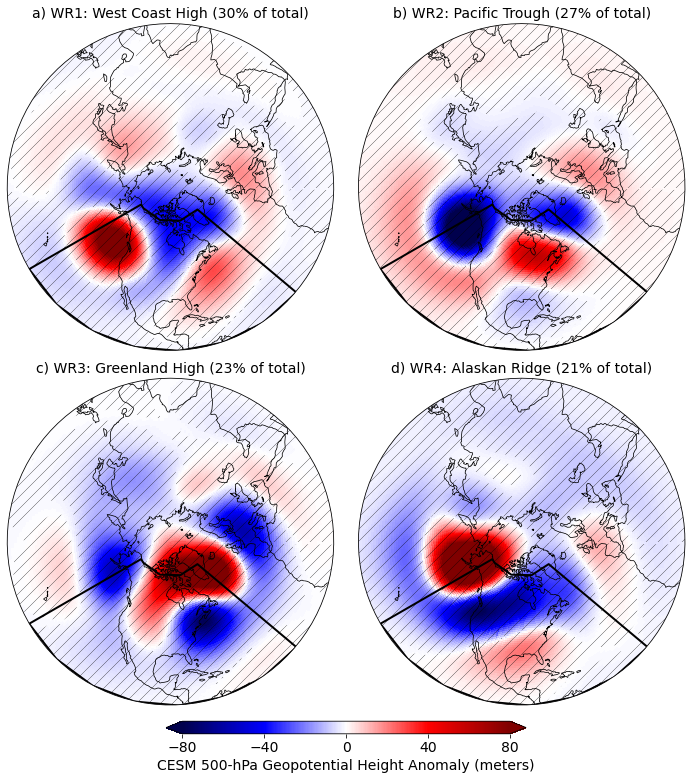

In [9]:
total = ds_cesm['wr_nums'].sum().values
lons, lats = np.meshgrid(ds_cesm['wr1_cesm'].lon, ds_cesm['wr1_cesm'].lat)

# ---

fig, axs = plt.subplots(
    2, 2,
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=-90.0)),
    figsize=(10, 10))

# ---

axs[1][1].pcolormesh(lons, lats, ds_cesm['wr1_cesm'].values,
                     transform=ccrs.PlateCarree(),
                     vmin=-80, vmax=80, cmap='seismic')

axs[1][1].contourf(lons, lats, np.where((
    ds_cesm['wr1_cesm'].values <= ds_cesm['wr1_cesm_005'].values) | (
    ds_cesm['wr1_cesm'].values >= ds_cesm['wr1_cesm_995'].values),
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[1][1].set_title(
    f'd) WR4: Alaskan Ridge ({int(np.around((ds_cesm["wr_nums"].isel(wr=0).values / total) * 100))}% of total)', 
    fontsize=14)

axs[1][1].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[1][1].margins(x=0, y=0)

axs[1][1].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[1][1].set_boundary(circle, transform=axs[1][1].transAxes)

geom = geometry.box(minx=210-360, maxx=320-360, miny=10, maxy=70)
# 10-70°N, 150-40°W
axs[1][1].add_geometries([geom], crs=cartopy.crs.PlateCarree(),
                         facecolor='none', edgecolor='k', lw=2.)

# ---

axs[1][0].pcolormesh(lons, lats, ds_cesm['wr2_cesm'].values, 
                     transform=ccrs.PlateCarree(), 
                     vmin=-80, vmax=80, cmap='seismic')

axs[1][0].contourf(lons, lats, np.where((
    ds_cesm['wr2_cesm'].values <= ds_cesm['wr2_cesm_005'].values) | (
    ds_cesm['wr2_cesm'].values >= ds_cesm['wr2_cesm_995'].values),
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[1][0].set_title(
    f'c) WR3: Greenland High ({int(np.around((ds_cesm["wr_nums"].isel(wr=1).values / total) * 100))}% of total)', 
    fontsize=14)
axs[1][0].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[1][0].margins(x=0, y=0)

axs[1][0].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[1][0].set_boundary(circle, transform=axs[1][0].transAxes)

geom = geometry.box(minx=210-360, maxx=320-360, miny=10, maxy=70)
# 10-70°N, 150-40°W
axs[1][0].add_geometries([geom], crs=cartopy.crs.PlateCarree(),
                         facecolor='none', edgecolor='k', lw=2.)

# ---

axs[0][1].pcolormesh(lons, lats, ds_cesm['wr3_cesm'].values,
                     transform=ccrs.PlateCarree(),
                     vmin=-80, vmax=80, cmap='seismic')

axs[0][1].contourf(lons, lats, np.where((
    ds_cesm['wr3_cesm'].values <= ds_cesm['wr3_cesm_005'].values) | (
    ds_cesm['wr3_cesm'].values >= ds_cesm['wr3_cesm_995'].values),
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[0][1].set_title(
    f'b) WR2: Pacific Trough ({int(np.around((ds_cesm["wr_nums"].isel(wr=2).values / total) * 100))}% of total)', 
    fontsize=14)
axs[0][1].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[0][1].margins(x=0,y=0)

axs[0][1].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[0][1].set_boundary(circle, transform=axs[0][1].transAxes)

geom = geometry.box(minx=210-360, maxx=320-360, miny=10, maxy=70)
# 10-70°N, 150-40°W
axs[0][1].add_geometries([geom], crs=cartopy.crs.PlateCarree(),
                         facecolor='none', edgecolor='k', lw=2.)

# ---

pm = axs[0][0].pcolormesh(lons, lats, ds_cesm['wr4_cesm'].values,
                          transform=ccrs.PlateCarree(),
                          vmin=-80, vmax=80, cmap='seismic')

axs[0][0].contourf(lons, lats, np.where((
    ds_cesm['wr4_cesm'].values <= ds_cesm['wr4_cesm_005'].values) | (
    ds_cesm['wr4_cesm'].values >= ds_cesm['wr4_cesm_995'].values),
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[0][0].set_title(
    f'a) WR1: West Coast High ({int(np.around((ds_cesm["wr_nums"].isel(wr=3).values / total) * 100))}% of total)', 
    fontsize=14)
axs[0][0].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[0][0].margins(x=0, y=0)

axs[0][0].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[0][0].set_boundary(circle, transform=axs[0][0].transAxes)

geom = geometry.box(minx=210-360, maxx=320-360, miny=10, maxy=70)
# 10-70°N, 150-40°W
axs[0][0].add_geometries([geom], crs=cartopy.crs.PlateCarree(),
                         facecolor='none', edgecolor='k', lw=2.)

# ---

cbar_ax = fig.add_axes([0.25, -0.025, 0.5, 0.0175])

ticks_1 = [-80, -40, 0, 40, 80]
cbar = fig.colorbar(pm, cax=cbar_ax, ticks=ticks_1[:],
                    orientation='horizontal', extend='both')

cbar.ax.tick_params(labelsize=14)
cbar.set_label(
    r'CESM 500-hPa Geopotential Height Anomaly (meters)', fontsize=14)

# ---

plt.tight_layout()
plt.savefig("fig1_wr_cesm.png", bbox_inches='tight', dpi=500)
plt.savefig("fig1_wr_cesm.pdf", bbox_inches='tight')
plt.show()

# ---

### calculating pearson correlation for text

In [10]:
from scipy import stats

In [23]:
stats.pearsonr(
    ds_era5['wr4_era5'].sel(lat=slice(10,70),lon=slice((-150+360),(-40+360))).values.flatten(), 
    ds_cesm['wr4_cesm'].sel(lat=slice(10,70),lon=slice((-150+360),(-40+360))).values.flatten()
)[0]

0.9942567444669328

In [22]:
stats.pearsonr(
    ds_era5['wr3_era5'].sel(lat=slice(10,70),lon=slice((-150+360),(-40+360))).values.flatten(), 
    ds_cesm['wr3_cesm'].sel(lat=slice(10,70),lon=slice((-150+360),(-40+360))).values.flatten()
)[0]

0.9889605312170267

In [20]:
stats.pearsonr(
    ds_era5['wr2_era5'].sel(lat=slice(10,70),lon=slice((-150+360),(-40+360))).values.flatten(), 
    ds_cesm['wr2_cesm'].sel(lat=slice(10,70),lon=slice((-150+360),(-40+360))).values.flatten()
)[0]

0.9929010775790615

In [21]:
stats.pearsonr(
    ds_era5['wr1_era5'].sel(lat=slice(10,70),lon=slice((-150+360),(-40+360))).values.flatten(), 
    ds_cesm['wr1_cesm'].sel(lat=slice(10,70),lon=slice((-150+360),(-40+360))).values.flatten()
)[0]

0.9892440192835331